## Data loading

### Subtask:
Load the data from the provided CSV file into a pandas DataFrame.


In [67]:
import os

import pandas as pd

try:
    df = pd.read_csv('D:/code/SC_ADHD/datasets/ABCD/task-fMRI/deviation/SCdeviation_nbackActivation_deviation_ADHD_TDtest.csv', low_memory=False)
    # print(df.head())
    # print(df.shape)
except FileNotFoundError:
    print("Error: File not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Unable to parse the CSV file.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

df.head()

,scanID,SC.1_centile,SC.1_deviationZ,SC.1_standard,SC.2_centile,SC.2_deviationZ,SC.2_standard,SC.3_centile,SC.3_deviationZ,SC.3_standard,...,nbackDM.A_deviationZ,nbackDM.B_deviationZ,nbackVS.P_deviationZ,nbackSM.A_deviationZ,nbackSM.B_deviationZ,nbackDA.A_deviationZ,nbackDA.B_deviationZ,nbackVA.A_deviationZ,nbackVA.B_deviationZ,meanFDnback
0,sub-NDARINV00UMK5VC_ses-baselineYear1Arm1,0.839780,0.993555,16.759154,0.578620,0.198366,0.009216,0.829000,0.950223,10.643901,...,-1.027846,-1.403210,-0.688914,-0.333489,-0.143362,-0.798198,-0.249993,-0.146222,-0.727771,0.250559
1,sub-NDARINV021403LF_ses-baselineYear1Arm1,0.776847,0.761587,15.316513,0.584877,0.214385,0.008556,0.284758,-0.568763,6.935844,...,-0.501555,-0.056958,0.057898,1.500679,0.653861,0.189507,0.836534,-0.212781,-1.198313,0.159335
2,sub-NDARINV02EBX0JJ_ses-4YearFollowUpYArm1,0.584956,0.214589,16.053036,0.887027,1.210866,0.019323,0.372746,-0.324588,8.817915,...,-1.201797,-1.307495,0.187179,-1.776353,-1.427383,0.124980,-0.963477,-0.490919,-0.178548,0.061652
3,sub-NDARINV02JXJUZG_ses-baselineYear1Arm1,0.085769,-1.367277,9.192126,0.897353,1.266612,0.019175,0.200566,-0.839602,6.775247,...,-0.343895,-0.354352,-1.276558,-1.070358,-0.566372,-0.001833,-0.688068,-0.141377,0.285770,0.351891
4,sub-NDARINV02WP3TP6_ses-2YearFollowUpYArm1,0.307379,-0.503294,12.877139,0.380519,-0.304117,0.006980,0.615318,0.293208,9.693971,...,2.307244,2.103244,-0.262273,1.973582,2.091332,-0.320230,0.182561,1.993314,1.859996,0.325535


## Data exploration

### Subtask:
Explore the dataset to understand its structure, identify missing values, and examine the distributions of the `feature_columns` and `predict_columns`. Check the data types of each column.


In [68]:
df = df[df["if_TD"] == "ADHD"].reset_index(drop=True)
feature_columns = [
    "SC.109_deviationZ", "SC.111_deviationZ", "SC.116_deviationZ", "SC.118_deviationZ",
    "SC.119_deviationZ", "SC.120_deviationZ", "SC.18_deviationZ", "SC.57_deviationZ",
    "SC.59_deviationZ", "SC.60_deviationZ", "SC.65_deviationZ", "SC.70_deviationZ",
    "SC.79_deviationZ", "SC.84_deviationZ", "SC.8_deviationZ", "SC.93_deviationZ",
    "SC.98_deviationZ"
]
predict_columns = [
    "nbackFP.A_deviationZ",
    "nbackFP.B_deviationZ",
    "nbackSM.A_deviationZ",
    "nbackSM.B_deviationZ",
    "nbackVA.B_deviationZ"
]
covariates_list = ["age", "sex", "if_TD"]
df = df[feature_columns + predict_columns + covariates_list]
# Check for missing values
# print(df.isnull().sum())
df.head()

,SC.109_deviationZ,SC.111_deviationZ,SC.116_deviationZ,SC.118_deviationZ,SC.119_deviationZ,SC.120_deviationZ,SC.18_deviationZ,SC.57_deviationZ,SC.59_deviationZ,SC.60_deviationZ,...,SC.93_deviationZ,SC.98_deviationZ,nbackFP.A_deviationZ,nbackFP.B_deviationZ,nbackSM.A_deviationZ,nbackSM.B_deviationZ,nbackVA.B_deviationZ,age,sex,if_TD
0,1.395502,-2.512633,0.771489,0.132326,-0.021918,-0.352272,0.526549,-0.949264,0.866574,-0.069589,...,-0.864707,-0.424853,-0.287071,-0.689381,1.500679,0.653861,-1.198313,9.083333,1,ADHD
1,-1.850883,-0.563860,-0.700345,0.251686,-0.153727,-0.377614,0.877628,0.052215,1.438277,1.162344,...,-1.893293,-0.224186,0.705627,0.597357,0.539553,0.987301,0.896324,10.666667,2,ADHD
2,-1.460422,0.581655,0.410014,-0.080388,0.149904,-0.216279,-0.418744,0.343847,-0.665531,0.452285,...,-0.802690,-0.854562,1.350649,1.277018,-0.224211,-0.169600,1.025337,11.083333,2,ADHD
3,1.615687,0.031120,0.580460,0.972972,0.370512,0.739132,1.915306,0.466657,-0.922914,-0.306011,...,1.110271,0.528977,-1.347239,-0.395787,-0.828981,-0.618824,-0.934917,10.916667,1,ADHD
4,1.229563,-0.527207,-0.729862,1.196794,0.493873,1.100956,0.153423,-0.136126,0.705135,0.970635,...,0.580528,0.669451,0.769281,1.275148,2.107015,1.590217,0.868310,12.000000,2,ADHD


SC.109_deviationZ       float64
SC.111_deviationZ       float64
SC.116_deviationZ       float64
SC.118_deviationZ       float64
SC.119_deviationZ       float64
SC.120_deviationZ       float64
SC.18_deviationZ        float64
SC.57_deviationZ        float64
SC.59_deviationZ        float64
SC.60_deviationZ        float64
SC.65_deviationZ        float64
SC.70_deviationZ        float64
SC.79_deviationZ        float64
SC.84_deviationZ        float64
SC.8_deviationZ         float64
SC.93_deviationZ        float64
SC.98_deviationZ        float64
nbackFP.A_deviationZ    float64
nbackFP.B_deviationZ    float64
nbackSM.A_deviationZ    float64
nbackSM.B_deviationZ    float64
nbackVA.B_deviationZ    float64
age                     float64
sex                       int64
if_TD                    object
dtype: object

Descriptive statistics for SC.109_deviationZ:
count    648.000000
mean       0.057907
std        1.006772
min       -3.394916
25%       -0.605964
50%        0.021056
75%        0.774648

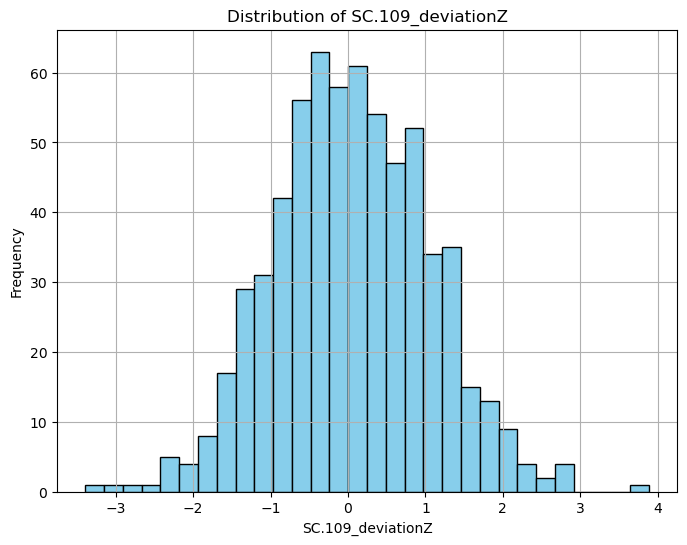

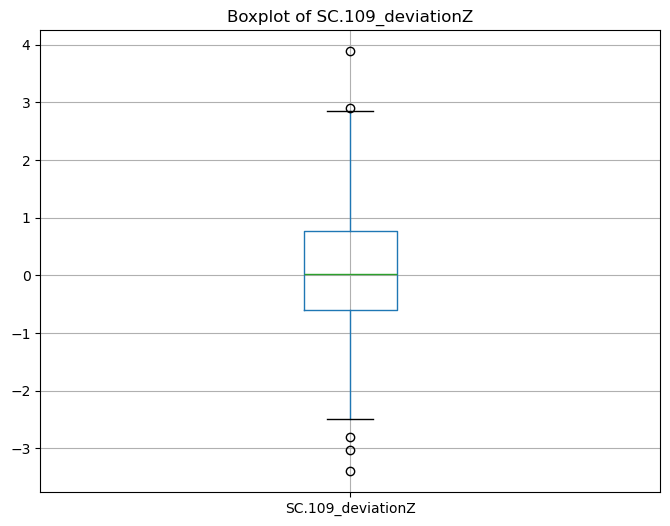


Descriptive statistics for SC.111_deviationZ:
count    648.000000
mean       0.024054
std        1.050134
min       -3.105187
25%       -0.669693
50%       -0.011441
75%        0.761017
max        2.947019
Name: SC.111_deviationZ, dtype: float64


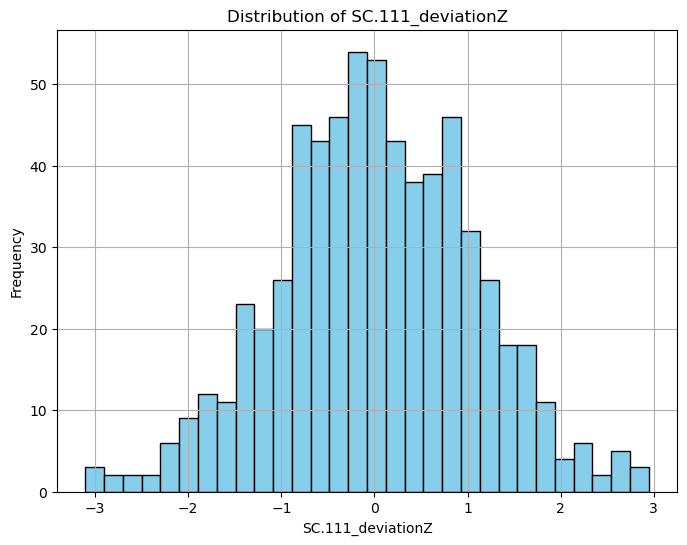

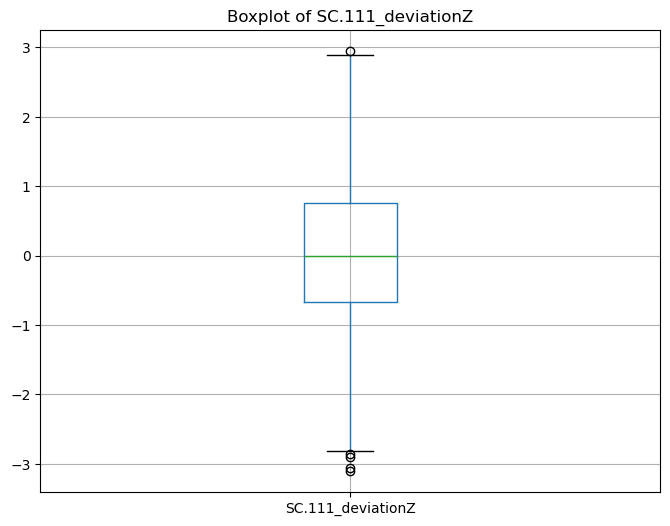


Descriptive statistics for SC.116_deviationZ:
count    648.000000
mean       0.061897
std        0.974574
min       -3.153177
25%       -0.596298
50%        0.083142
75%        0.689083
max        3.301644
Name: SC.116_deviationZ, dtype: float64


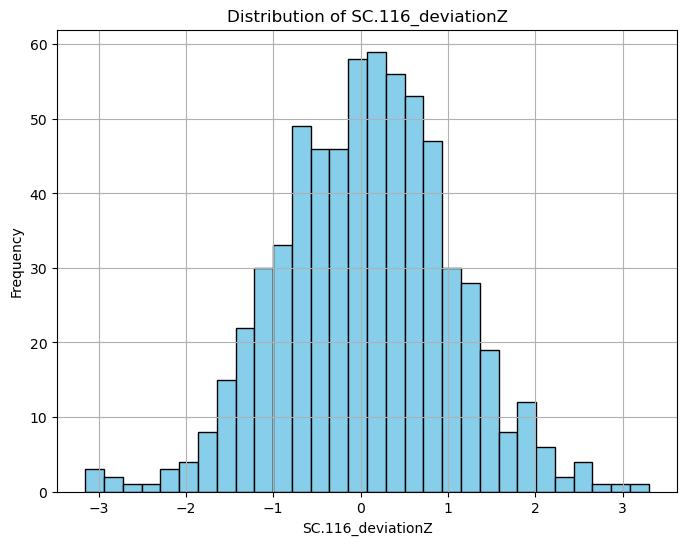

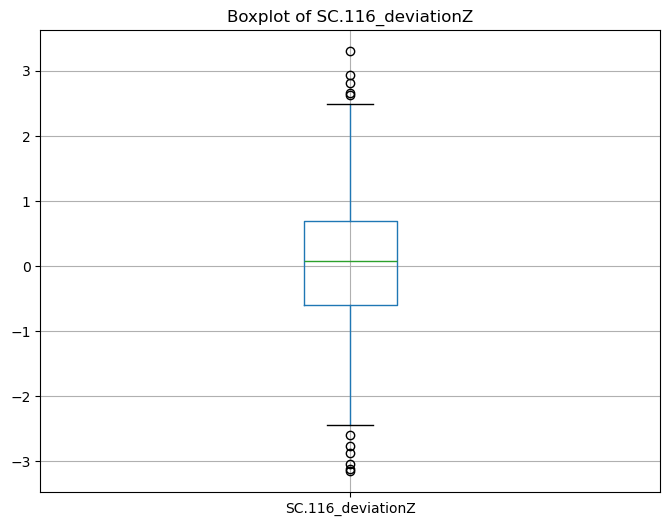


Descriptive statistics for SC.118_deviationZ:
count    648.000000
mean       0.142913
std        1.037349
min       -3.522199
25%       -0.492130
50%        0.104670
75%        0.784314
max        4.516809
Name: SC.118_deviationZ, dtype: float64


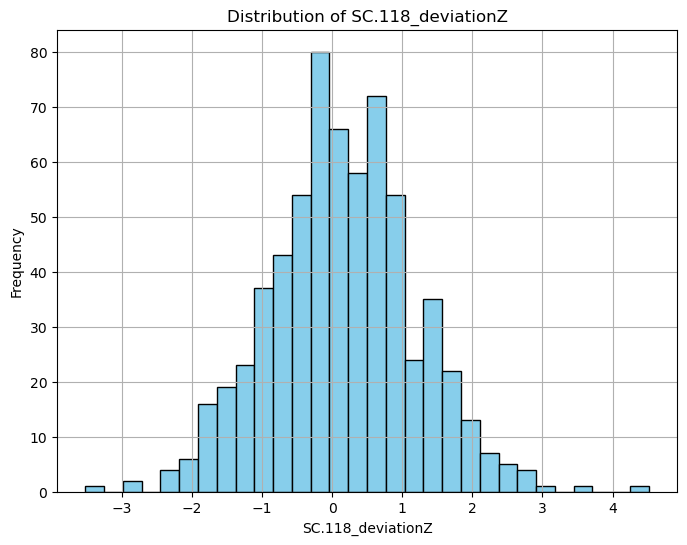

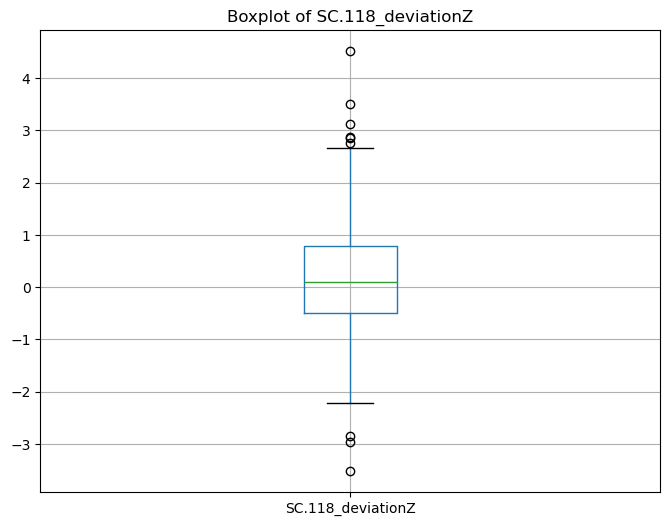


Descriptive statistics for SC.119_deviationZ:
count    648.000000
mean       0.057005
std        1.013986
min       -2.629268
25%       -0.594399
50%        0.074836
75%        0.704051
max        4.064624
Name: SC.119_deviationZ, dtype: float64


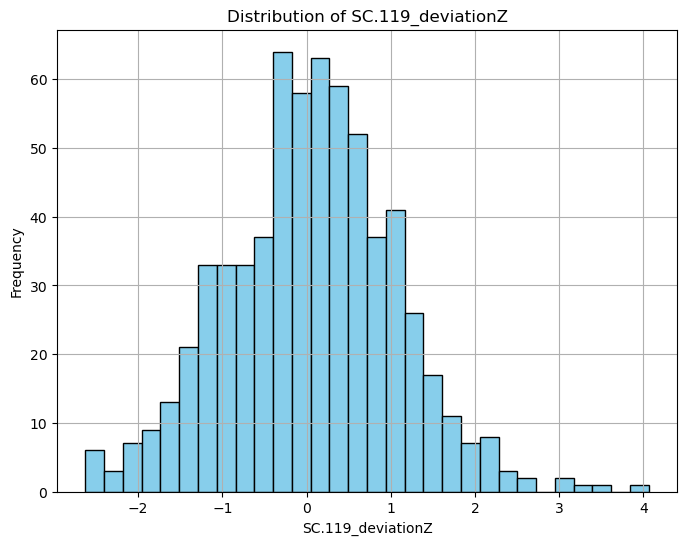

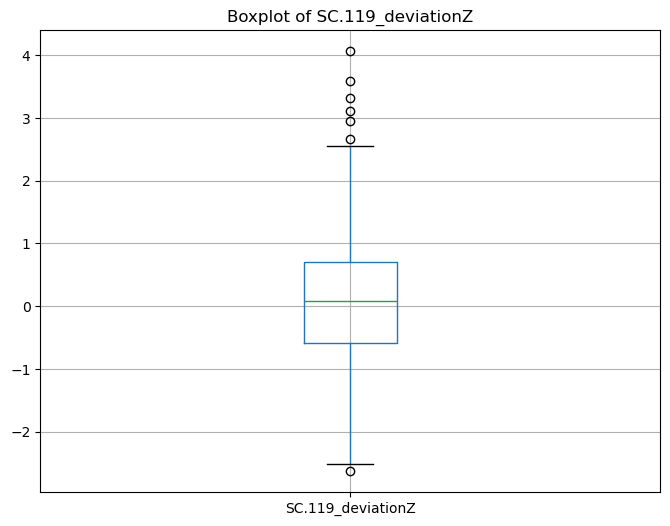


Descriptive statistics for SC.120_deviationZ:
count    648.000000
mean       0.066082
std        0.987826
min       -2.905820
25%       -0.608738
50%        0.040033
75%        0.702542
max        4.084512
Name: SC.120_deviationZ, dtype: float64


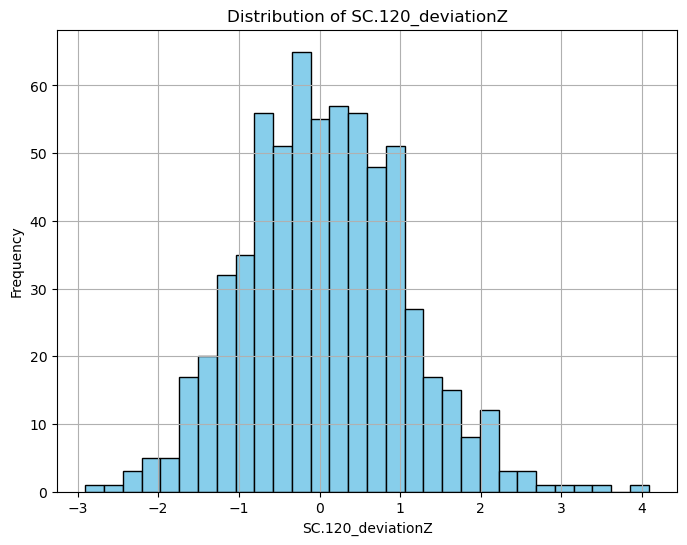

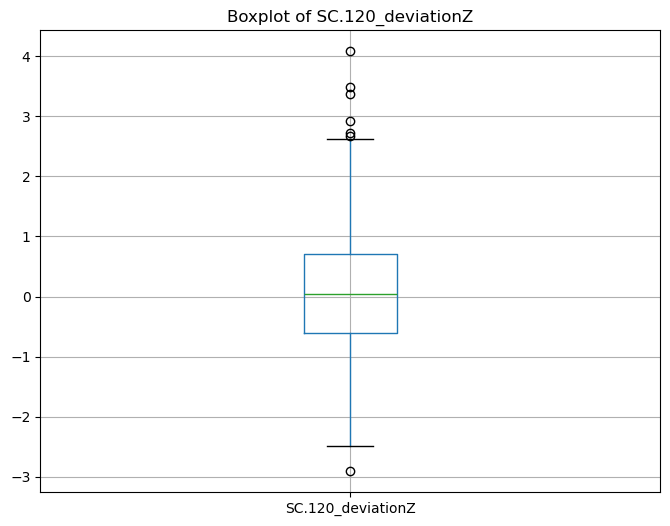


Descriptive statistics for SC.18_deviationZ:
count    648.000000
mean       0.001606
std        0.953528
min       -2.663285
25%       -0.715216
50%        0.032218
75%        0.678510
max        2.757466
Name: SC.18_deviationZ, dtype: float64


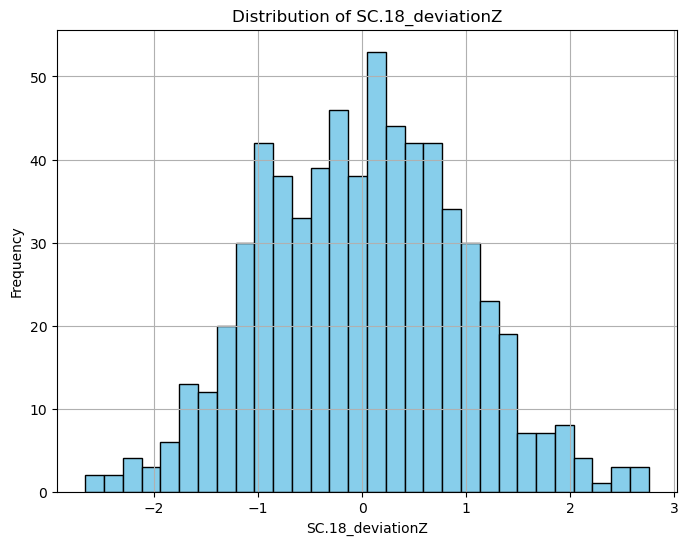

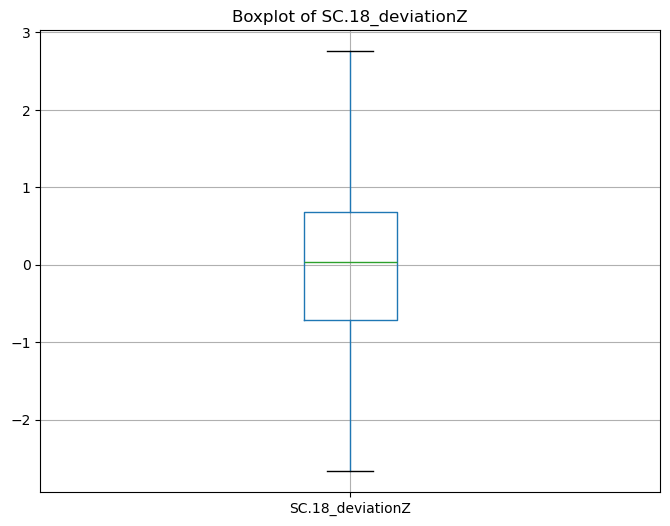


Descriptive statistics for SC.57_deviationZ:
count    648.000000
mean       0.031072
std        0.990899
min       -3.436313
25%       -0.671551
50%        0.041115
75%        0.657366
max        3.479267
Name: SC.57_deviationZ, dtype: float64


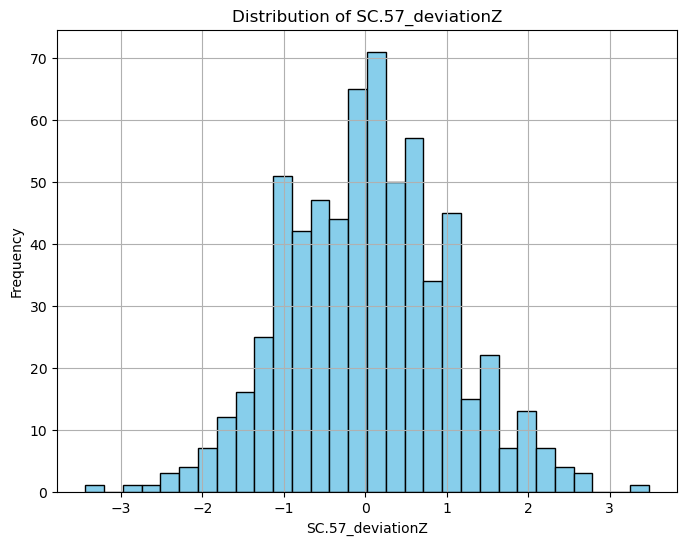

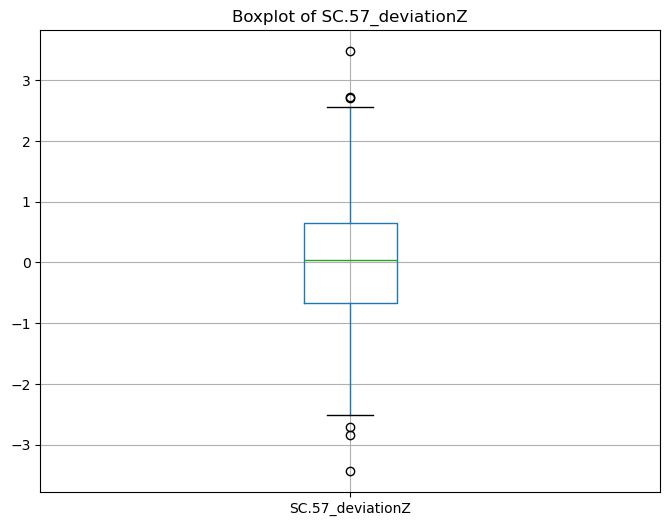


Descriptive statistics for SC.59_deviationZ:
count    648.000000
mean       0.116512
std        1.013988
min       -4.035014
25%       -0.524659
50%        0.100161
75%        0.808359
max        3.252014
Name: SC.59_deviationZ, dtype: float64


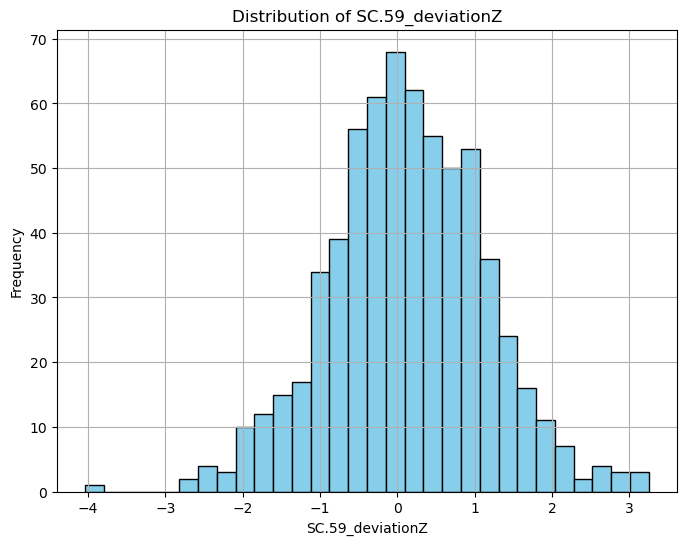

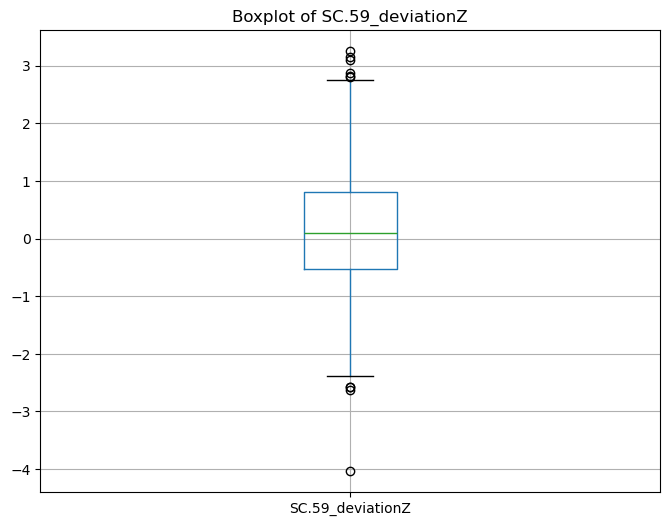


Descriptive statistics for SC.60_deviationZ:
count    648.000000
mean       0.019226
std        0.987296
min       -2.750259
25%       -0.647904
50%        0.084736
75%        0.665243
max        3.044436
Name: SC.60_deviationZ, dtype: float64


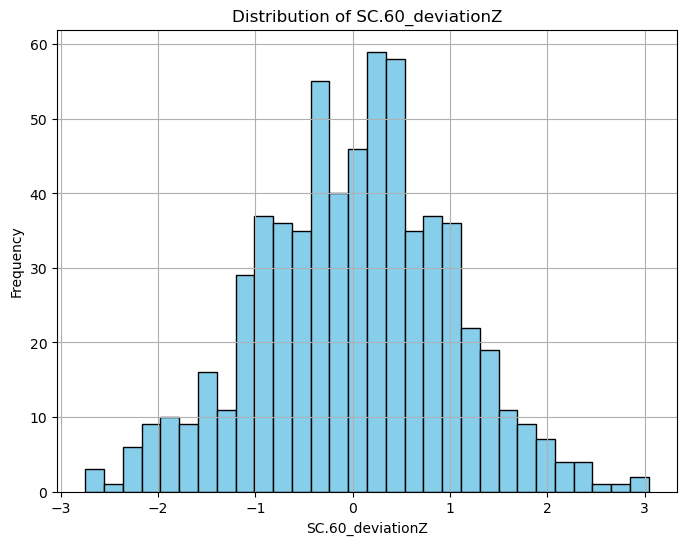

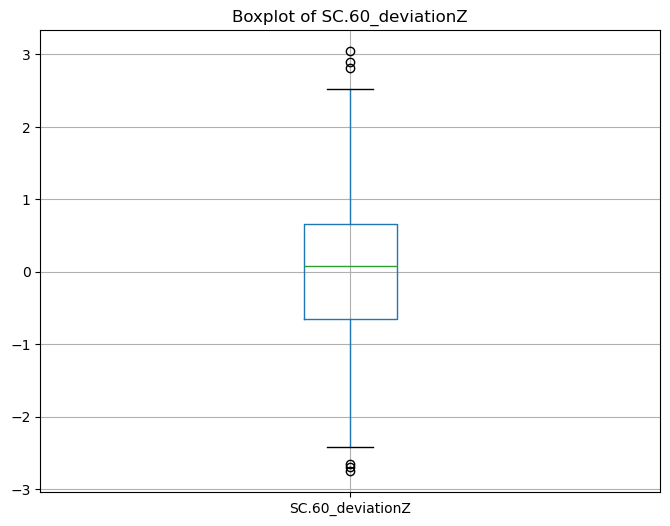


Descriptive statistics for SC.65_deviationZ:
count    648.000000
mean       0.023348
std        1.015282
min       -2.975097
25%       -0.704746
50%        0.055738
75%        0.713027
max        3.443832
Name: SC.65_deviationZ, dtype: float64


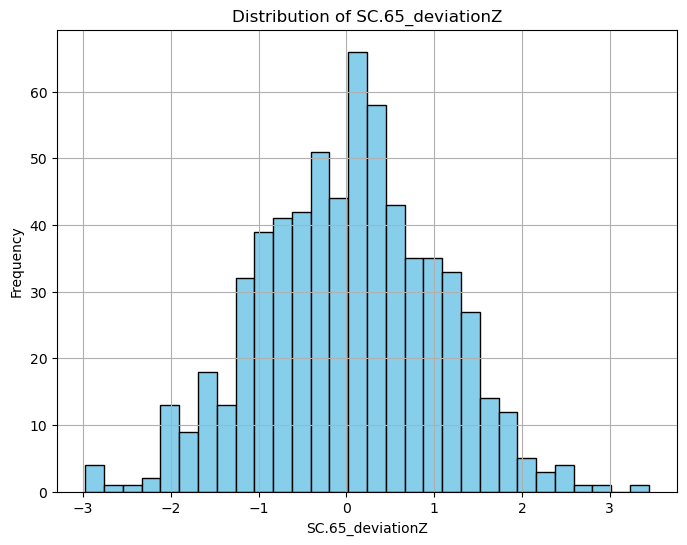

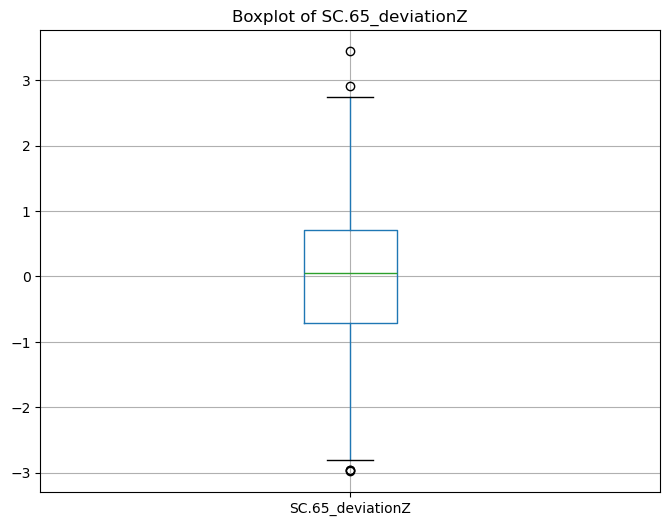


Descriptive statistics for SC.70_deviationZ:
count    648.000000
mean      -0.008088
std        0.999966
min       -3.569417
25%       -0.603079
50%       -0.004913
75%        0.644798
max        2.755384
Name: SC.70_deviationZ, dtype: float64


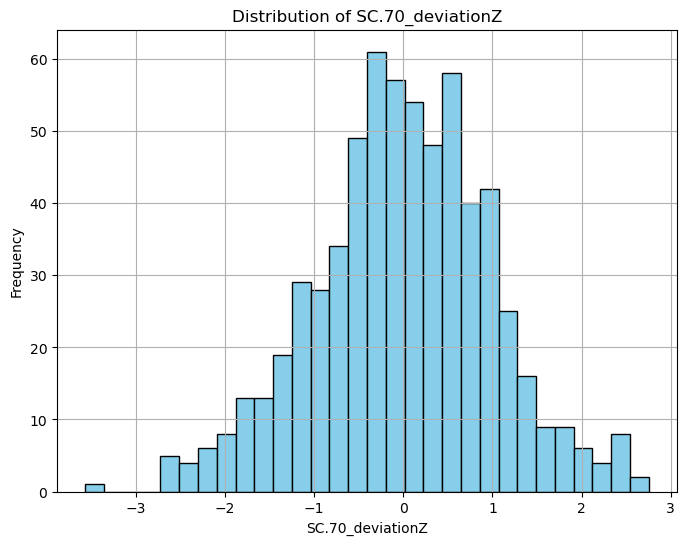

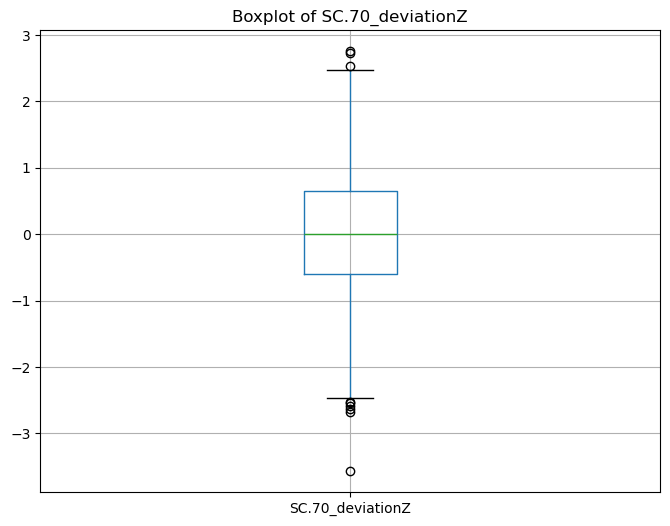


Descriptive statistics for SC.79_deviationZ:
count    648.000000
mean      -0.026763
std        1.007409
min       -3.134065
25%       -0.694770
50%       -0.055538
75%        0.658585
max        2.906984
Name: SC.79_deviationZ, dtype: float64


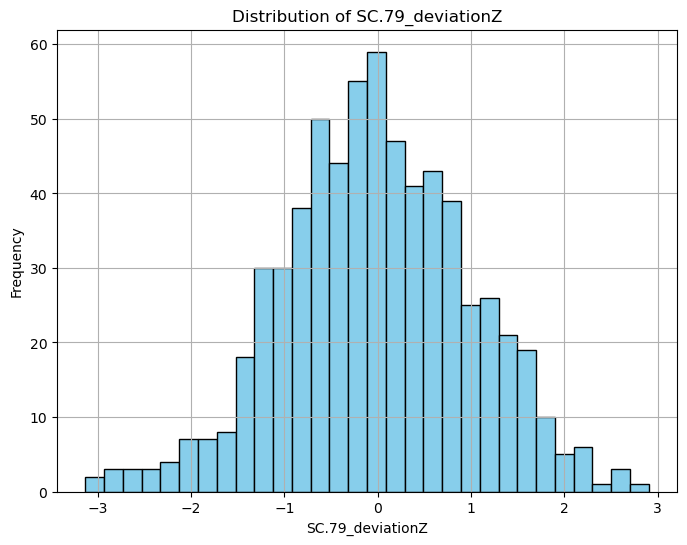

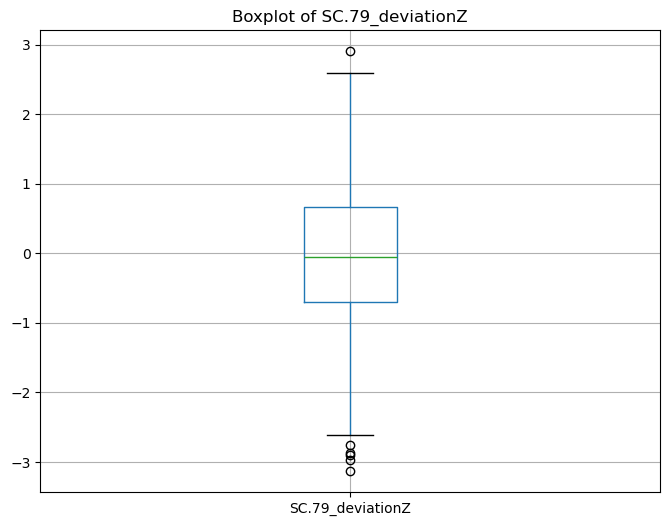


Descriptive statistics for SC.84_deviationZ:
count    648.000000
mean      -0.009648
std        1.015763
min       -3.786567
25%       -0.664890
50%       -0.028336
75%        0.706901
max        2.507730
Name: SC.84_deviationZ, dtype: float64


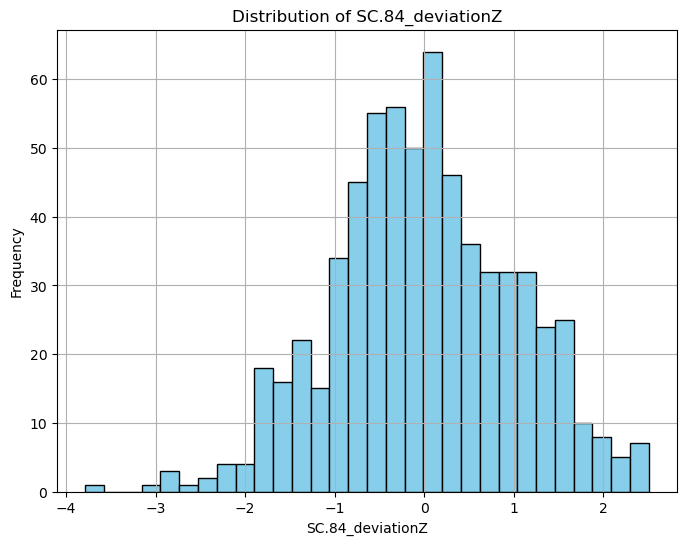

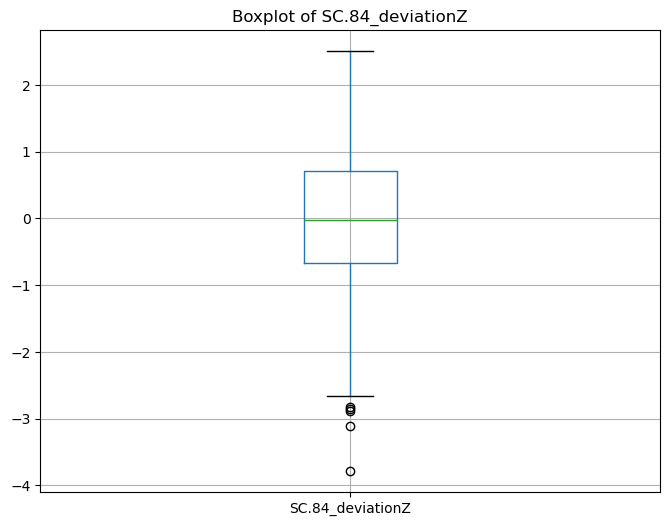


Descriptive statistics for SC.8_deviationZ:
count    648.000000
mean       0.015230
std        1.084033
min       -3.702723
25%       -0.633309
50%       -0.019989
75%        0.653897
max        3.999297
Name: SC.8_deviationZ, dtype: float64


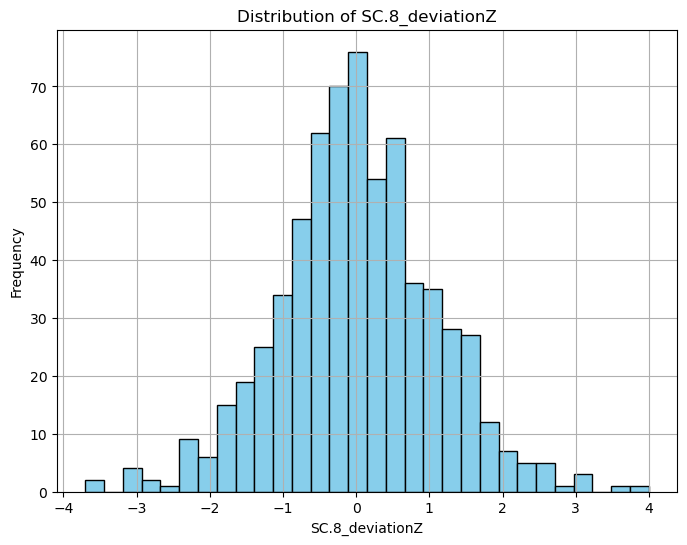

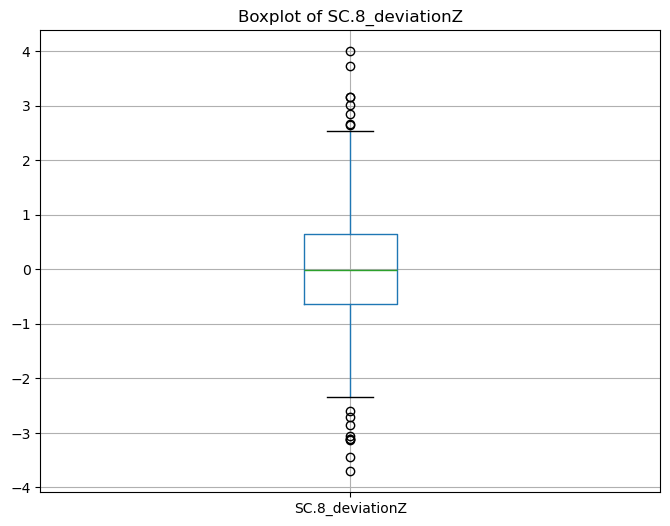


Descriptive statistics for SC.93_deviationZ:
count    648.000000
mean       0.049179
std        1.026531
min       -3.122792
25%       -0.639839
50%        0.066499
75%        0.694659
max        4.469725
Name: SC.93_deviationZ, dtype: float64


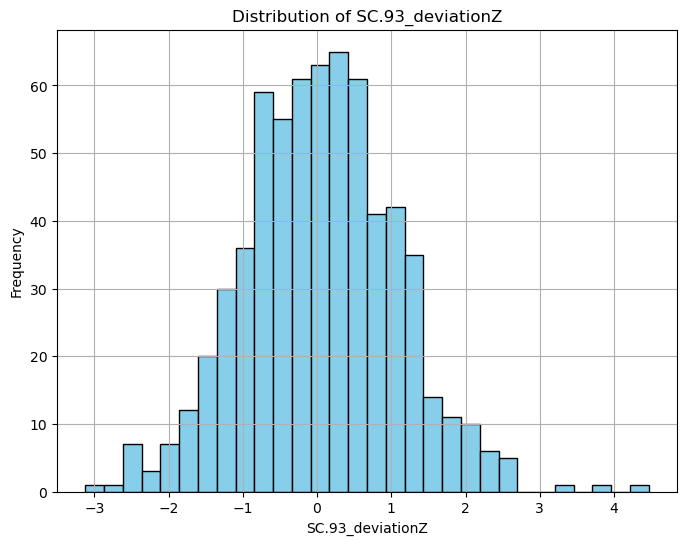

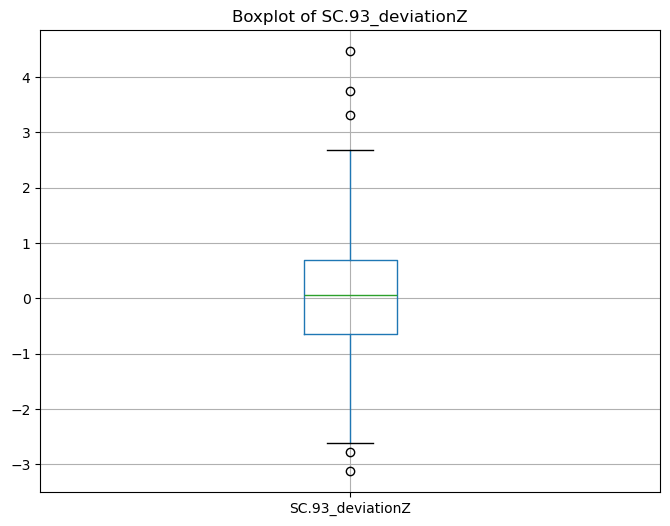


Descriptive statistics for SC.98_deviationZ:
count    648.000000
mean       0.039522
std        1.018190
min       -3.548438
25%       -0.610230
50%        0.006365
75%        0.725969
max        4.860931
Name: SC.98_deviationZ, dtype: float64


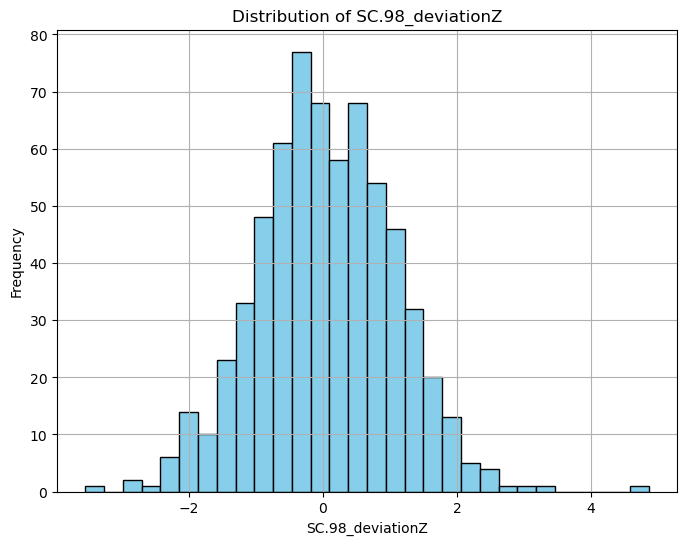

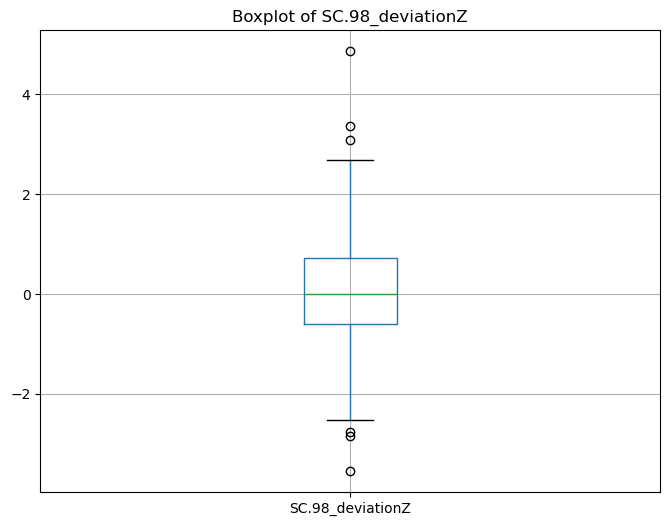


Descriptive statistics for nbackFP.A_deviationZ:
count    648.000000
mean      -0.197926
std        1.010311
min       -3.669662
25%       -0.944682
50%       -0.225371
75%        0.460944
max        3.271697
Name: nbackFP.A_deviationZ, dtype: float64


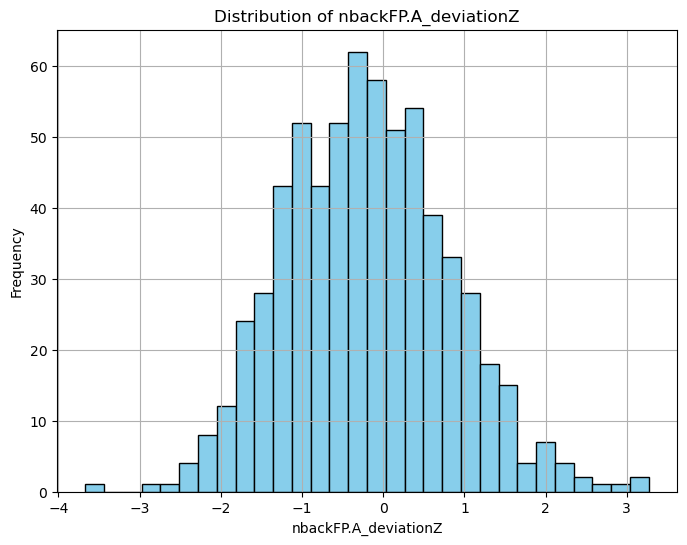

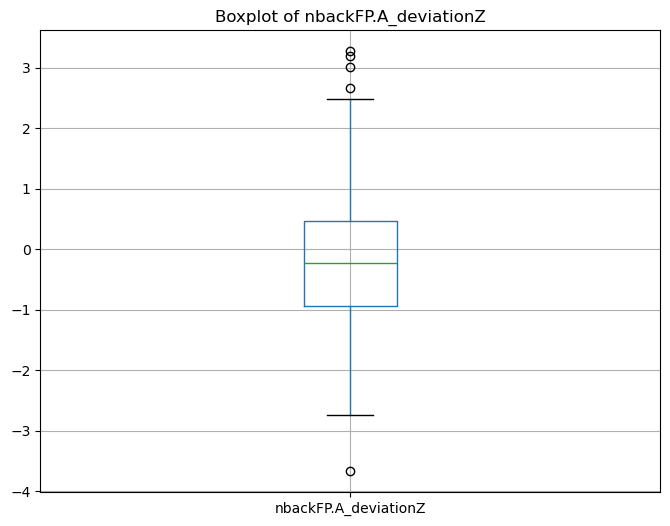


Descriptive statistics for nbackFP.B_deviationZ:
count    648.000000
mean      -0.145337
std        1.022820
min       -3.699166
25%       -0.878613
50%       -0.193867
75%        0.515292
max        2.954902
Name: nbackFP.B_deviationZ, dtype: float64


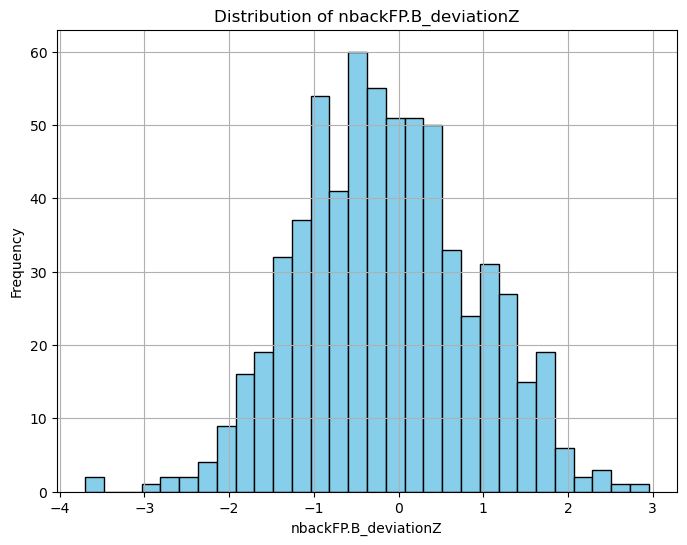

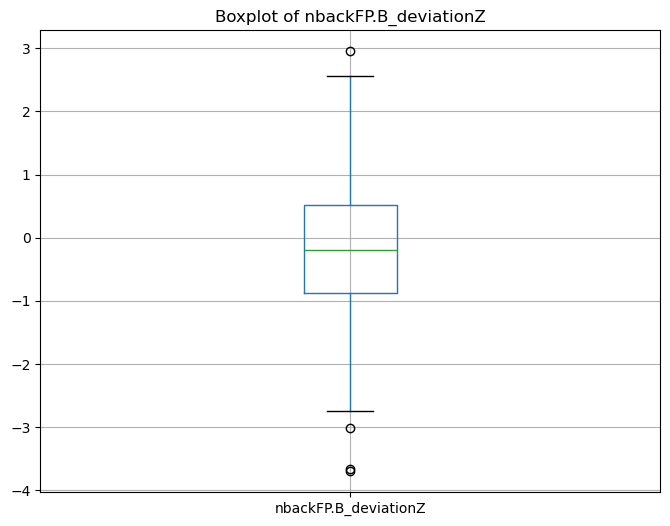


Descriptive statistics for nbackSM.A_deviationZ:
count    648.000000
mean       0.132071
std        0.999813
min       -2.854261
25%       -0.496496
50%        0.168189
75%        0.809759
max        2.858977
Name: nbackSM.A_deviationZ, dtype: float64


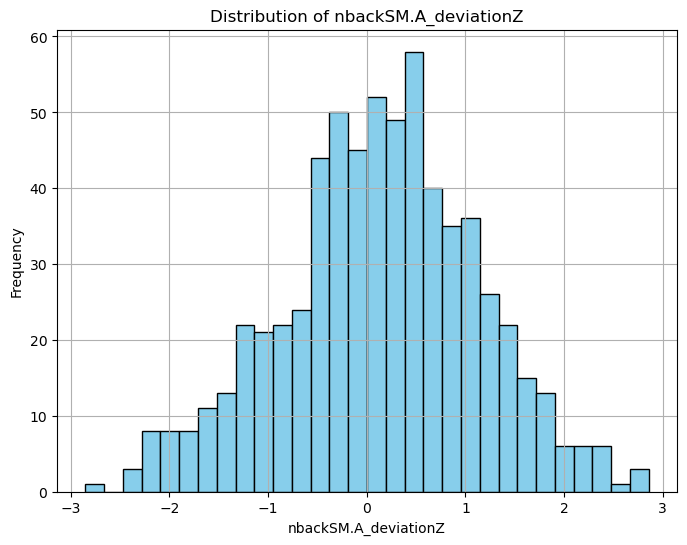

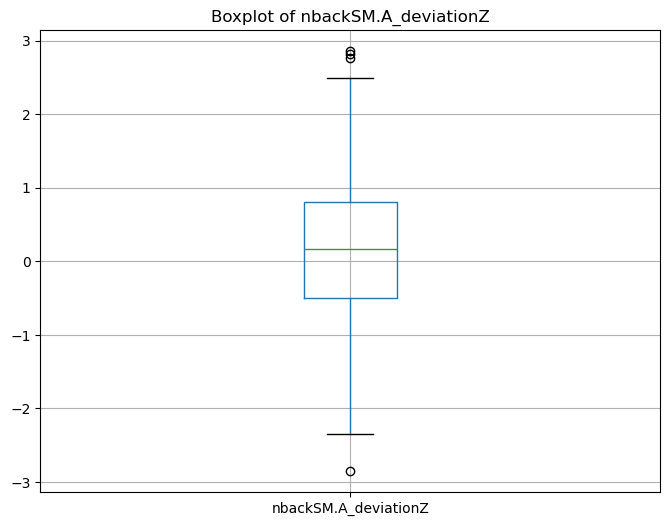


Descriptive statistics for nbackSM.B_deviationZ:
count    648.000000
mean       0.148561
std        0.996455
min       -2.878764
25%       -0.499100
50%        0.196739
75%        0.808000
max        3.124474
Name: nbackSM.B_deviationZ, dtype: float64


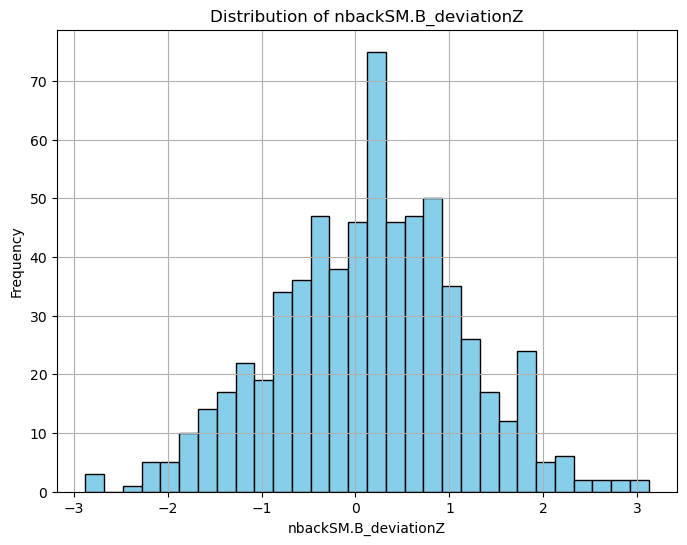

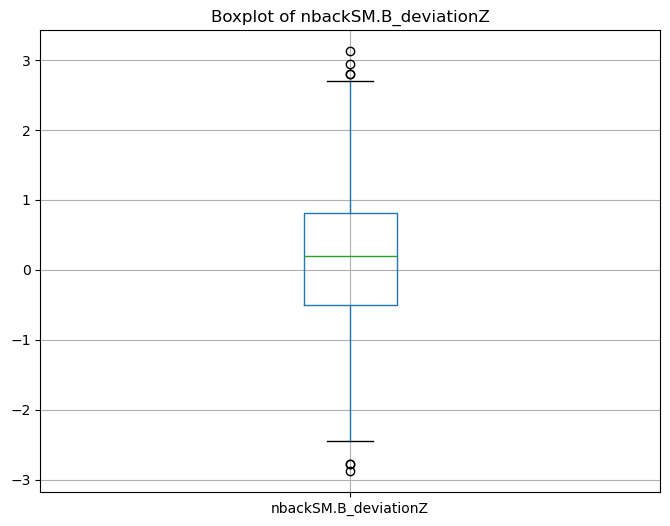


Descriptive statistics for nbackVA.B_deviationZ:
count    648.000000
mean      -0.111136
std        1.007298
min       -3.223967
25%       -0.804357
50%       -0.110709
75%        0.566679
max        3.330829
Name: nbackVA.B_deviationZ, dtype: float64


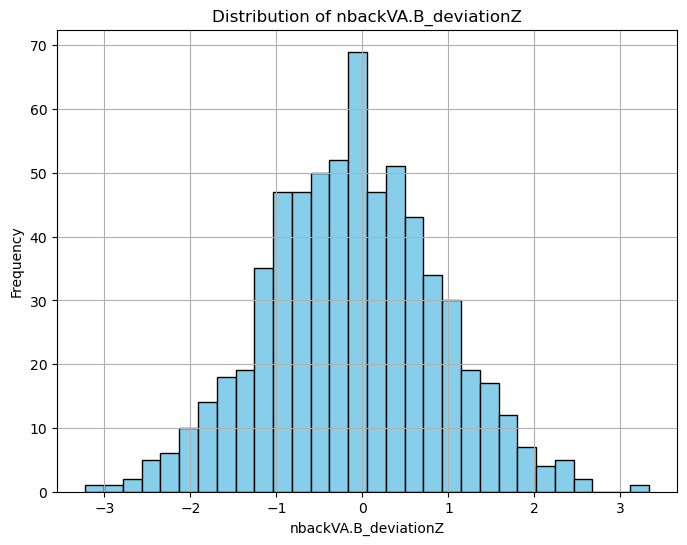

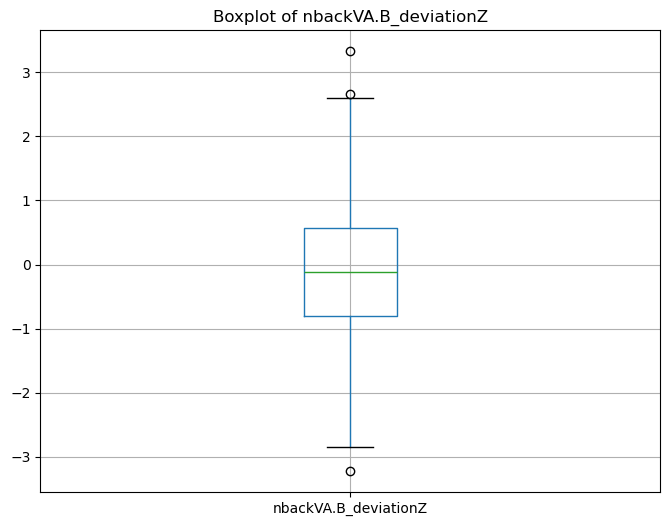

In [70]:
import pandas as pd
import matplotlib.pyplot as plt



# Check data types
print(df.dtypes)

# Descriptive statistics and distributions
for col in feature_columns + predict_columns:
    print(f"\nDescriptive statistics for {col}:")
    print(df[col].describe())
    plt.figure(figsize=(8, 6))
    df[col].hist(bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    plt.figure(figsize=(8,6))
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

# Correlation analysis
# correlation_matrix = df.corr()
# print("\nCorrelation Matrix:")
# print(correlation_matrix)
# # Focus on the correlation between feature_columns and predict_columns
# print("\nCorrelation between feature and predict columns:")
# print(correlation_matrix.loc[feature_columns, predict_columns])

## Feature engineering

### Subtask:
Scale or normalize the features (feature_columns) to improve model performance. Consider standardization (z-score normalization) given the "_deviationZ" suffix in the column names.


In [79]:
# Correlation analysis

feature_columns = [
    "SC.109_deviationZ", "SC.111_deviationZ", "SC.116_deviationZ", "SC.118_deviationZ",
    "SC.119_deviationZ", "SC.120_deviationZ", "SC.18_deviationZ", "SC.57_deviationZ",
    "SC.59_deviationZ", "SC.60_deviationZ", "SC.65_deviationZ", "SC.70_deviationZ",
    "SC.79_deviationZ", "SC.84_deviationZ", "SC.8_deviationZ", "SC.93_deviationZ",
    "SC.98_deviationZ"
]
predict_columns = [
    "nbackFP.A_deviationZ",
    "nbackFP.B_deviationZ",
    "nbackSM.A_deviationZ",
    "nbackSM.B_deviationZ",
    "nbackVA.B_deviationZ"
]

temp_df = df[feature_columns + predict_columns]

correlation_matrix = temp_df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)
# Focus on the correlation between feature_columns and predict_columns
print("\nCorrelation between feature and predict columns:")
print(correlation_matrix.loc[feature_columns, predict_columns])


Correlation Matrix:
                      SC.109_deviationZ  SC.111_deviationZ  SC.116_deviationZ  \
SC.109_deviationZ              1.000000           0.134657           0.426788   
SC.111_deviationZ              0.134657           1.000000           0.088262   
SC.116_deviationZ              0.426788           0.088262           1.000000   
SC.118_deviationZ              0.469009           0.294252           0.336514   
SC.119_deviationZ              0.497047           0.218683           0.495815   
SC.120_deviationZ              0.405728           0.240154           0.342730   
SC.18_deviationZ               0.393714           0.118005           0.318947   
SC.57_deviationZ               0.170775           0.071625           0.188286   
SC.59_deviationZ               0.239515           0.118201           0.155651   
SC.60_deviationZ               0.299982           0.092746           0.320910   
SC.65_deviationZ               0.404624           0.100116           0.373544   
SC.70_d

In [91]:
selected_feature_col_dict = {}
for col in predict_columns:
    correlations = correlation_matrix.loc[feature_columns, col].abs()

    top_5 = correlations.nlargest(5)
    print(top_5)

    selected_feature_col_dict[col] = top_5.index.tolist()

print(selected_feature_col_dict)

SC.116_deviationZ    0.061918
SC.8_deviationZ      0.039242
SC.109_deviationZ    0.033817
SC.98_deviationZ     0.030893
SC.93_deviationZ     0.029729
Name: nbackFP.A_deviationZ, dtype: float64
SC.116_deviationZ    0.060761
SC.120_deviationZ    0.057639
SC.119_deviationZ    0.056349
SC.84_deviationZ     0.044171
SC.8_deviationZ      0.043420
Name: nbackFP.B_deviationZ, dtype: float64
SC.18_deviationZ    0.127562
SC.8_deviationZ     0.074443
SC.79_deviationZ    0.070625
SC.84_deviationZ    0.064729
SC.59_deviationZ    0.057381
Name: nbackSM.A_deviationZ, dtype: float64
SC.18_deviationZ     0.105069
SC.59_deviationZ     0.081877
SC.8_deviationZ      0.067059
SC.70_deviationZ     0.054787
SC.116_deviationZ    0.049205
Name: nbackSM.B_deviationZ, dtype: float64
SC.109_deviationZ    0.075838
SC.59_deviationZ     0.070387
SC.98_deviationZ     0.055490
SC.93_deviationZ     0.048984
SC.8_deviationZ      0.030648
Name: nbackVA.B_deviationZ, dtype: float64
{'nbackFP.A_deviationZ': ['SC.116_deviat

In [71]:
# Regress the confounds
from regress_covariates import regress_covariates
feature_columns = [
    "SC.109_deviationZ", "SC.111_deviationZ", "SC.116_deviationZ", "SC.118_deviationZ",
    "SC.119_deviationZ", "SC.120_deviationZ", "SC.18_deviationZ", "SC.57_deviationZ",
    "SC.59_deviationZ", "SC.60_deviationZ", "SC.65_deviationZ", "SC.70_deviationZ",
    "SC.79_deviationZ", "SC.84_deviationZ", "SC.8_deviationZ", "SC.93_deviationZ",
    "SC.98_deviationZ"
]
predict_columns = [
    "nbackFP.A_deviationZ",
    "nbackFP.B_deviationZ",
    "nbackSM.A_deviationZ",
    "nbackSM.B_deviationZ",
    "nbackVA.B_deviationZ"
]

df['sex'] = df['sex'].astype('category')
covariates_list = ["age", "sex"]
covariates_data = df[covariates_list]
category_cov_list = ["sex"]
print(df[predict_columns].head())
df[predict_columns] = regress_covariates(df[predict_columns].copy(), covariates_data, covariates_list, category_cov_list)
print(df[predict_columns].head())




   nbackFP.A_deviationZ  nbackFP.B_deviationZ  nbackSM.A_deviationZ  \
0             -0.287071             -0.689381              1.500679   
1              0.705627              0.597357              0.539553   
2              1.350649              1.277018             -0.224211   
3             -1.347239             -0.395787             -0.828981   
4              0.769281              1.275148              2.107015   

   nbackSM.B_deviationZ  nbackVA.B_deviationZ  
0              0.653861             -1.198313  
1              0.987301              0.896324  
2             -0.169600              1.025337  
3             -0.618824             -0.934917  
4              1.590217              0.868310  
   nbackFP.A_deviationZ  nbackFP.B_deviationZ  nbackSM.A_deviationZ  \
0             -0.104709             -0.509911              1.464580   
1              0.891278              0.758429              0.413293   
2              1.539772              1.431322             -0.366595   
3

In [72]:
import pandas as pd
from sklearn.preprocessing import StandardScaler



# Select features for scaling
df_features = df[feature_columns]

# Initialize and fit the scaler
scaler = StandardScaler()
scaler.fit(df_features)

# Transform the features
df_scaled_features = pd.DataFrame(scaler.transform(df_features), columns=feature_columns)

# Combine scaled features with target variables
df_prepared = pd.concat([df_scaled_features, df[predict_columns]], axis=1)

df_prepared.head()
# print(df_prepared.isnull().sum())

,SC.109_deviationZ,SC.111_deviationZ,SC.116_deviationZ,SC.118_deviationZ,SC.119_deviationZ,SC.120_deviationZ,SC.18_deviationZ,SC.57_deviationZ,SC.59_deviationZ,SC.60_deviationZ,...,SC.79_deviationZ,SC.84_deviationZ,SC.8_deviationZ,SC.93_deviationZ,SC.98_deviationZ,nbackFP.A_deviationZ,nbackFP.B_deviationZ,nbackSM.A_deviationZ,nbackSM.B_deviationZ,nbackVA.B_deviationZ
0,1.329623,-2.417451,0.728668,-0.010213,-0.077895,-0.423837,0.550953,-0.990104,0.740286,-0.090028,...,-0.105276,-0.067048,-0.247810,-0.890955,-0.456431,-0.104709,-0.509911,1.464580,0.641082,-1.034127
1,-1.897415,-0.560279,-0.782731,0.104938,-0.207985,-0.449512,0.919426,0.021354,1.304539,1.158722,...,0.213448,0.423083,-0.925387,-1.893730,-0.259197,0.891278,0.758429,0.413293,0.853952,1.041312
2,-1.509281,0.531391,0.357476,-0.215427,0.091688,-0.286062,-0.441177,0.315892,-0.771851,0.438971,...,1.417356,0.497562,-0.029983,-0.830493,-0.878790,1.539772,1.431322,-0.366595,-0.326289,1.159096
3,1.548496,0.006734,0.532503,0.800792,0.309422,0.681871,2.008518,0.439926,-1.025879,-0.329677,...,0.917632,1.164140,-0.722460,1.034465,0.481082,-1.149602,-0.246096,-0.936022,-0.734299,-0.820140
4,1.164673,-0.525349,-0.813043,1.016722,0.431175,1.048437,0.159339,-0.168864,0.580951,0.964396,...,-0.251426,-0.555288,0.436495,0.518016,0.619154,0.966042,1.414563,1.929161,1.382181,0.977364


## Data splitting

### Subtask:
Split the prepared data into training and testing sets using k-fold cross-validation (k=5).


## SVM permutation importance

In [115]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import os
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance

import xgboost as xgb
model_name = "SVR_rbf"
if model_name == "SVR_linear":
    model = SVR(kernel="linear", C=0.6)
elif model_name == "SVR_rbf":
    model = SVR(kernel='rbf', C=0.6)
else:
    model = LinearRegression()

feature_columns = [
    "SC.109_deviationZ", "SC.111_deviationZ", "SC.116_deviationZ", "SC.118_deviationZ",
    "SC.119_deviationZ", "SC.120_deviationZ", "SC.18_deviationZ", "SC.57_deviationZ",
    "SC.59_deviationZ", "SC.60_deviationZ", "SC.65_deviationZ", "SC.70_deviationZ",
    "SC.79_deviationZ", "SC.84_deviationZ", "SC.8_deviationZ", "SC.93_deviationZ",
    "SC.98_deviationZ"
]

predict_columns = [
    "nbackFP.A_deviationZ",
    "nbackFP.B_deviationZ",
    "nbackSM.A_deviationZ",
    "nbackSM.B_deviationZ",
    "nbackVA.B_deviationZ"
]

# 存储所有 run 的平均相关系数
all_runs_avg_correlations = {col: [] for col in predict_columns}
all_importances = []  # 存储每个 fold 的排列重要性

# 重复运行 10 次 10-fold CV
for run in range(10):
    kf = KFold(n_splits=10, shuffle=True, random_state=run)
    splits = []

    for train_index, test_index in kf.split(df_prepared):
        X_train = df_prepared.iloc[train_index][feature_columns]
        X_test = df_prepared.iloc[test_index][feature_columns]
        y_train = df_prepared.iloc[train_index][predict_columns]
        y_test = df_prepared.iloc[test_index][predict_columns]
        splits.append((X_train, X_test, y_train, y_test))

    # 存储每 fold 的预测结果
    model_predictions = {}

    for fold_index, (X_train, X_test, y_train, y_test) in enumerate(splits):
        model_predictions[fold_index] = {}
        for predict_column in predict_columns:
            # ✅ 使用 SVR_rbf
            model = SVR(kernel='rbf', C=0.6)

            selected_features = selected_feature_col_dict[predict_column]
            X_train_sel = X_train[selected_features]
            X_test_sel = X_test[selected_features]

            # ✅ 标准化（SVR 对尺度敏感，必须）
            from sklearn.preprocessing import StandardScaler
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train_sel)
            X_test_scaled = scaler.transform(X_test_sel)

            # ✅ 训练 SVR
            model.fit(X_train_scaled, y_train[predict_column])

            # ✅ 预测
            predictions = model.predict(X_test_scaled)
            model_predictions[fold_index][predict_column] = predictions

            # ✅ 计算排列重要性
            from sklearn.inspection import permutation_importance
            perm_result = permutation_importance(
                model, X_test_scaled, y_test[predict_column],
                n_repeats=5,
                random_state=run,
                scoring='neg_mean_squared_error'
            )

            # ✅ 提取重要性均值
            importances = perm_result.importances_mean

            # ✅ 构建字典：特征名 → 重要性
            imp_dict = {
                feat: imp for feat, imp in zip(selected_features, importances)
            }
            imp_dict['run'] = run
            imp_dict['fold'] = fold_index
            imp_dict['target'] = predict_column

            # ✅ 保存
            all_importances.append(imp_dict)

    # 原有相关性计算逻辑不变
    average_correlations = {}
    for predict_column in predict_columns:
        correlations = []
        for fold_index in range(len(splits)):
            y_true = splits[fold_index][3][predict_column]
            y_pred = model_predictions[fold_index][predict_column]
            corr = np.corrcoef(y_true, y_pred)[0, 1]
            correlations.append(corr)
        average_correlations[predict_column] = np.mean(correlations)

    print(f"Run {run + 1} average correlations:")
    for col in predict_columns:
        print(f"  {col}: {average_correlations[col]:.4f}")
        all_runs_avg_correlations[col].append(average_correlations[col])

print("\nFinal average correlations over 10 runs:")
for col in predict_columns:
    avg_over_runs = np.mean(all_runs_avg_correlations[col])
    print(f"  {col}: {avg_over_runs:.4f}")

importance_df = pd.DataFrame(all_importances)

# 创建输出目录
output_dir = os.path.join("D:/code/SC_ADHD/datasets/prediction/activation_deviation", model_name)
os.makedirs(output_dir, exist_ok=True)

# 按每个 target 保存
for target in predict_columns:
    target_df = importance_df[importance_df['target'] == target]
    target_df.to_csv(f"{output_dir}/feature_importance_{target}.csv", index=False)

# 保存所有
importance_df.to_csv(f"{output_dir}/all_feature_importance.csv", index=False)

print(f"✅ 排列重要性已保存至: {output_dir}")

for target in predict_columns:
    target_data = importance_df[importance_df['target'] == target]
    selected_features = selected_feature_col_dict[target]

    avg_imp = target_data[selected_features].mean(axis=0).sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    avg_imp.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Permutation Importance - {target}')
    plt.ylabel('Importance (MSE reduction)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f"{output_dir}/importance_{target}.png", dpi=300)
    plt.close()

Run 1 average correlations:
  nbackFP.A_deviationZ: 0.0564
  nbackFP.B_deviationZ: 0.0234
  nbackSM.A_deviationZ: 0.0696
  nbackSM.B_deviationZ: 0.0677
  nbackVA.B_deviationZ: 0.1372
Run 2 average correlations:
  nbackFP.A_deviationZ: 0.0747
  nbackFP.B_deviationZ: 0.0314
  nbackSM.A_deviationZ: 0.0664
  nbackSM.B_deviationZ: 0.0672
  nbackVA.B_deviationZ: 0.1457
Run 3 average correlations:
  nbackFP.A_deviationZ: 0.0741
  nbackFP.B_deviationZ: 0.0375
  nbackSM.A_deviationZ: 0.0350
  nbackSM.B_deviationZ: 0.0167
  nbackVA.B_deviationZ: 0.1656
Run 4 average correlations:
  nbackFP.A_deviationZ: 0.0720
  nbackFP.B_deviationZ: 0.0629
  nbackSM.A_deviationZ: 0.0529
  nbackSM.B_deviationZ: 0.0518
  nbackVA.B_deviationZ: 0.1067
Run 5 average correlations:
  nbackFP.A_deviationZ: 0.0914
  nbackFP.B_deviationZ: 0.0576
  nbackSM.A_deviationZ: 0.0623
  nbackSM.B_deviationZ: 0.0384
  nbackVA.B_deviationZ: 0.1523
Run 6 average correlations:
  nbackFP.A_deviationZ: 0.0847
  nbackFP.B_deviationZ: 0.

In [110]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import os
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance

import xgboost as xgb
model_name = "SVR_rbf"
if model_name == "SVR_linear":
    model = SVR(kernel="linear", C=0.6)
elif model_name == "SVR_rbf":
    model = SVR(kernel='rbf', C=0.6)
else:
    model = LinearRegression()

feature_columns = [
    "SC.109_deviationZ", "SC.111_deviationZ", "SC.116_deviationZ", "SC.118_deviationZ",
    "SC.119_deviationZ", "SC.120_deviationZ", "SC.18_deviationZ", "SC.57_deviationZ",
    "SC.59_deviationZ", "SC.60_deviationZ", "SC.65_deviationZ", "SC.70_deviationZ",
    "SC.79_deviationZ", "SC.84_deviationZ", "SC.8_deviationZ", "SC.93_deviationZ",
    "SC.98_deviationZ"
]

predict_columns = [
    "nbackFP.A_deviationZ",
    "nbackFP.B_deviationZ",
    "nbackSM.A_deviationZ",
    "nbackSM.B_deviationZ",
    "nbackVA.B_deviationZ"
]

# 存储所有 run 的平均相关系数
all_runs_avg_correlations = {col: [] for col in predict_columns}
all_weights = []
# 重复运行 10 次 10-fold CV
for run in range(10):
    kf = KFold(n_splits=10, shuffle=True, random_state=run)
    splits = []

    for train_index, test_index in kf.split(df_prepared):
        X_train = df_prepared.iloc[train_index][feature_columns]
        X_test = df_prepared.iloc[test_index][feature_columns]
        y_train = df_prepared.iloc[train_index][predict_columns]
        y_test = df_prepared.iloc[test_index][predict_columns]
        splits.append((X_train, X_test, y_train, y_test))

    # 存储每 fold 的预测结果
    model_predictions = {}

    for fold_index, (X_train, X_test, y_train, y_test) in enumerate(splits):
        model_predictions[fold_index] = {}
        for predict_column in predict_columns:
            # model = SVR(kernel='rbf', C = 0.6)
            # model = xgb.XGBRegressor(
            #                 n_estimators=500,
            #                 learning_rate=0.01,
            #                 max_depth=3
            #             )
            model = LinearRegression()
            # model.fit(X_train, y_train[predict_column])
            # predictions = model.predict(X_test)
            model.fit(X_train[selected_feature_col_dict[predict_column]], y_train[predict_column])
            predictions = model.predict(X_test[selected_feature_col_dict[predict_column]])
            model_predictions[fold_index][predict_column] = predictions

            coef_dict = {feat: coef for feat, coef in zip(selected_feature_col_dict[predict_column], model.coef_)}
            coef_dict['intercept'] = model.intercept_
            coef_dict['run'] = run
            coef_dict['fold'] = fold_index
            coef_dict['target'] = predict_column

            all_weights.append(coef_dict)

    average_correlations = {}

    for predict_column in predict_columns:
        correlations = []
        for fold_index in range(len(splits)):
            y_true = splits[fold_index][3][predict_column]  # y_test
            y_pred = model_predictions[fold_index][predict_column]
            corr = np.corrcoef(y_true, y_pred)[0, 1]
            correlations.append(corr)
        average_correlations[predict_column] = np.mean(correlations)

    print(f"Run {run + 1} average correlations:")
    for col in predict_columns:
        print(f"  {col}: {average_correlations[col]:.4f}")
        all_runs_avg_correlations[col].append(average_correlations[col])

print("\nFinal average correlations over 10 runs:")
for col in predict_columns:
    avg_over_runs = np.mean(all_runs_avg_correlations[col])
    print(f"  {col}: {avg_over_runs:.4f}")

weights_df = pd.DataFrame(all_weights)


output_dir = os.path.join("D:/code/SC_ADHD/datasets/prediction/activation_deviation", model_name)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for target in predict_columns:
    target_df = weights_df[weights_df['target'] == target]
    target_df.to_csv(f"{output_dir}/feature_weights_{target}.csv", index=False)

# 或者保存所有目标到一个文件
weights_df.to_csv(f"{output_dir}/all_feature_weights.csv", index=False)


Run 1 average correlations:
  nbackFP.A_deviationZ: 0.0383
  nbackFP.B_deviationZ: 0.0006
  nbackSM.A_deviationZ: 0.1277
  nbackSM.B_deviationZ: 0.1284
  nbackVA.B_deviationZ: 0.0518
Run 2 average correlations:
  nbackFP.A_deviationZ: 0.0464
  nbackFP.B_deviationZ: -0.0355
  nbackSM.A_deviationZ: 0.1384
  nbackSM.B_deviationZ: 0.1323
  nbackVA.B_deviationZ: 0.0542
Run 3 average correlations:
  nbackFP.A_deviationZ: 0.0621
  nbackFP.B_deviationZ: -0.0088
  nbackSM.A_deviationZ: 0.1203
  nbackSM.B_deviationZ: 0.1149
  nbackVA.B_deviationZ: 0.0609
Run 4 average correlations:
  nbackFP.A_deviationZ: 0.0586
  nbackFP.B_deviationZ: 0.0083
  nbackSM.A_deviationZ: 0.1283
  nbackSM.B_deviationZ: 0.1350
  nbackVA.B_deviationZ: 0.0570
Run 5 average correlations:
  nbackFP.A_deviationZ: 0.0685
  nbackFP.B_deviationZ: -0.0049
  nbackSM.A_deviationZ: 0.1199
  nbackSM.B_deviationZ: 0.1215
  nbackVA.B_deviationZ: 0.0821
Run 6 average correlations:
  nbackFP.A_deviationZ: 0.0763
  nbackFP.B_deviationZ:

## Visualize coef

In [112]:
coef_summary_dict = {}

for target in predict_columns:
    # 获取该 target 实际使用的特征
    selected_features = selected_feature_col_dict[target]

    # 检查是否有这些特征在 weights_df 中
    available_cols = [col for col in selected_features if col in weights_df.columns]
    if len(available_cols) == 0:
        print(f"⚠️  No features found for {target} in weights_df")
        continue

    # 过滤出该 target 的数据，并只保留 selected features
    target_data = weights_df[weights_df['target'] == target].copy()
    coef_cols = [col for col in available_cols if col in target_data.columns]

    # 计算平均权重（跨所有 run 和 fold）
    avg_coefs = target_data[coef_cols].mean(axis=0)  # 对每个特征取平均

    # 转为 DataFrame 便于绘图
    coef_df = avg_coefs.reset_index()
    coef_df.columns = ['Feature', 'Coefficient']

    # 排序（可选：按绝对值降序）
    # coef_df = coef_df.loc[avg_coefs.abs().sort_values(ascending=False).index]

    # 设置颜色：正蓝，负红
    colors = ['red' if c < 0 else 'blue' for c in coef_df['Coefficient']]

    # 绘图
    plt.figure(figsize=(max(8, len(coef_df) * 0.8), 6))
    bars = plt.bar(coef_df['Feature'], coef_df['Coefficient'],
                   color=colors, alpha=0.8, edgecolor='black', linewidth=0.6)

    # 添加数值标签
    for bar, coef in zip(bars, coef_df['Coefficient']):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + (0.015 * (yval if yval >= 0 else -yval)),
                 f'{coef:.3f}', ha='center', va='bottom' if coef >= 0 else 'top', fontsize=9)

    plt.title(f'Feature Coefficients for "{target}"\n({len(coef_cols)} selected features)', fontsize=14, fontweight='bold')
    plt.ylabel('Coefficient', fontsize=12)
    plt.xlabel('Features', fontsize=12)
    plt.axhline(0, color='black', linewidth=0.8)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(coef_df['Coefficient'].min() * 1.2, coef_df['Coefficient'].max() * 1.2)
    plt.tight_layout()

    # 保存
    plot_path = f"{output_dir}/coef_bar_{target}.png"
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    plt.close()

In [73]:
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np

feature_columns = [
    "SC.109_deviationZ", "SC.111_deviationZ", "SC.116_deviationZ", "SC.118_deviationZ",
    "SC.119_deviationZ", "SC.120_deviationZ", "SC.18_deviationZ", "SC.57_deviationZ",
    "SC.59_deviationZ", "SC.60_deviationZ", "SC.65_deviationZ", "SC.70_deviationZ",
    "SC.79_deviationZ", "SC.84_deviationZ", "SC.8_deviationZ", "SC.93_deviationZ",
    "SC.98_deviationZ"
]
predict_columns = [
    "nbackFP.A_deviationZ",
    "nbackFP.B_deviationZ",
    "nbackSM.A_deviationZ",
    "nbackSM.B_deviationZ",
    "nbackVA.B_deviationZ"
]

kf = KFold(n_splits=10, shuffle=True, random_state=42)
splits = []

for train_index, test_index in kf.split(df_prepared):
    X_train = df_prepared.iloc[train_index, :][feature_columns]
    X_test = df_prepared.iloc[test_index, :][feature_columns]
    y_train = df_prepared.iloc[train_index, :][predict_columns]
    y_test = df_prepared.iloc[test_index, :][predict_columns]
    splits.append((X_train, X_test, y_train, y_test))

print(len(splits))
print(splits[0][0].shape)
print(splits[0][1].shape)
print(splits[0][2].shape)
print(splits[0][3].shape)

10
(583, 17)
(65, 17)
(583, 5)
(65, 5)


## Model training

### Subtask:
Train a regression model for each of the `predict_columns` using the corresponding `feature_columns` in each fold of the cross-validation.


In [76]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

feature_columns = [
    "SC.109_deviationZ", "SC.111_deviationZ", "SC.116_deviationZ", "SC.118_deviationZ",
    "SC.119_deviationZ", "SC.120_deviationZ", "SC.18_deviationZ", "SC.57_deviationZ",
    "SC.59_deviationZ", "SC.60_deviationZ", "SC.65_deviationZ", "SC.70_deviationZ",
    "SC.79_deviationZ", "SC.84_deviationZ", "SC.8_deviationZ", "SC.93_deviationZ",
    "SC.98_deviationZ"
]
predict_columns = [
    "nbackFP.A_deviationZ",
    "nbackFP.B_deviationZ",
    "nbackSM.A_deviationZ",
    "nbackSM.B_deviationZ",
    "nbackVA.B_deviationZ"
]

model_predictions = {}

for fold_index, (X_train, X_test, y_train, y_test) in enumerate(splits):
    model_predictions[fold_index] = {}
    for predict_column in predict_columns:
        model = LinearRegression()
        # model = SVR(kernel='rbf')
        model.fit(X_train, y_train[predict_column])
        predictions = model.predict(X_test)
        model_predictions[fold_index][predict_column] = predictions

## Model evaluation

### Subtask:
Evaluate the performance of the trained models by calculating the correlation between predicted and actual values for each `predict_column` in each fold. Average the correlation scores across the folds to obtain a robust performance metric.


**Reasoning**:
Calculate the correlation between predicted and actual values for each predict_column in each fold.



In [77]:
import numpy as np

feature_columns = [
    "SC.109_deviationZ", "SC.111_deviationZ", "SC.116_deviationZ", "SC.118_deviationZ",
    "SC.119_deviationZ", "SC.120_deviationZ", "SC.18_deviationZ", "SC.57_deviationZ",
    "SC.59_deviationZ", "SC.60_deviationZ", "SC.65_deviationZ", "SC.70_deviationZ",
    "SC.79_deviationZ", "SC.84_deviationZ", "SC.8_deviationZ", "SC.93_deviationZ",
    "SC.98_deviationZ"
]
predict_columns = [
    "nbackFP.A_deviationZ",
    "nbackFP.B_deviationZ",
    "nbackSM.A_deviationZ",
    "nbackSM.B_deviationZ",
    "nbackVA.B_deviationZ"
]

average_correlations = {}

for predict_column in predict_columns:
    correlations = []
    for fold_index, (X_train, X_test, y_train, y_test) in enumerate(splits):
        correlation_matrix = np.corrcoef(
            y_test[predict_column], model_predictions[fold_index][predict_column]
        )
        correlation = correlation_matrix[0, 1]
        correlations.append(correlation)
    average_correlations[predict_column] = np.mean(correlations)

for predict_column in predict_columns:
    print(predict_column, ": ", average_correlations[predict_column])

nbackFP.A_deviationZ :  -0.06624232091430399
nbackFP.B_deviationZ :  -0.07400844091430801
nbackSM.A_deviationZ :  0.040399500315741896
nbackSM.B_deviationZ :  0.03580993976355549
nbackVA.B_deviationZ :  -0.019575796864873964
